## - NHANES Data: [NHANES 2021-2023](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2021-2023)
- **Marital Status** (`DMDMARTZ`) - created categorical DMDMARTZ_group, recoding (married or not married). - ***DEMO_L.xpt***
- **Education Level** (`DMDEDUC2`) - created categorical DMDEDUC2_group,recoding (bachelor’s or higher vs. less than bachelor’s). - ***DEMO_L.xpt***
- **Age in Years** (`RIDAGEYR`) - continuous.- ***DEMO_L.xpt***
- **Systolic Blood Pressure** (`BPXOSY3`) - continuous. - ***BPXO_L_Doc.xpt***
- **Diastolic Blood Pressure** (`BPXODI3`) - continuous. - ***BPXO_L_Doc.xpt***
- **Vitamin D Lab Interpretation** (`LBDVD2LC`) - categorical, two levels (remove values with null).- ***VID_L.xpt***
- **Hepatitis B Lab Antibodies** (`LBXHBS`) - categorical, needs recoding to two levels.- ***HEPB_S_L.xpt***
- **Weak/Failing Kidneys** (`KIQ022`) - categorical, can be treated as two levels (remove values `7`, `9`, and null). - ***KIQ_U_L.xpt***
- **Minutes of Sedentary Behavior** (`PAD680`) - continuous, needs cleaning (remove values `7777`, `9999`, and null).- ***PAQ_L.xpt***
- **Current Self-Reported Weight** (`WHD020`) - continuous, needs cleaning (remove values `7777`, `9999`, and null).- ***WHQ_L.xpt***eeds cleaning (remove values `7777`, `9999`, and null).- ***WHQ_L.xpt***
## Link to CoLab Notebook
- [NHANES 2021-2023 Analysis R Notebook](https://colab.research.google.com/drive/1hlUxsNHHuJDp82hvQ2PKxQnxG2rtsEU6#scrollTo=bTjeqhZscwgW)

In [9]:
#Install package to read .xpt files
install.packages("haven")
 library(haven)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
#Download data set to R data frame
# storage url path = 'https://storage.googleapis.com/mledu-datasets/'
 xpt_hepb_data <- read_xpt("/content/HEPB_S_L.xpt")
 xpt_demo_data <- read_xpt("/content/DEMO_L.xpt")
 xpt_bpxo_data <- read_xpt("/content/BPXO_L.xpt")
 xpt_kiq_data <- read_xpt("/content/KIQ_U_L.xpt")
 xpt_whq_data <- read_xpt("/content/WHQ_L.xpt")
 xpt_vid_data <- read_xpt("/content/VID_L.xpt")
 xpt_paq_data <- read_xpt("/content/PAQ_L.xpt")
 #colnames(xpt_whq_data)



**Clean data tables by removing "Missing", "Don't Know", and "Refused" data points from responders.**

In [11]:
# Clean data set removing values 7777,9999, and null
# Omitting Refused, Missing data from Physical Activity data set
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm
paq_data_clean <- subset (xpt_paq_data, PAD680!= '7777' & PAD680 != '9999' & !is.na(PAD680))
#colnames(xpt_whq_data)
# Omitting Refused, Missing data from Weight History data set
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.htm
 whq_data_clean <- subset (xpt_whq_data, WHD020!= '7777' & WHD020 != '9999' & !is.na(WHD020))

In [12]:
# Omitting 'Missing', 'Don't know', 'Refused' Matrital status and Education level
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.htm
demo_data_clean <- subset (xpt_demo_data, !is.na(DMDMARTZ) & DMDMARTZ !=77 &  DMDMARTZ !=99 & ! is.na(DMDEDUC2) & DMDEDUC2 !=7 &  DMDEDUC2 !=9)
#demo_data_clean[, c("SEQN","DMDMARTZ", "DMDEDUC2")]

In [13]:
#Omitting 'Missing' data from Systolic and Diastolic 3rd oscillometeric reading data set
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.htm#BPXOSY3
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.htm#BPXODI3
bpxo_data_clean <- subset (xpt_bpxo_data, !is.na(BPXOSY3) & !is.na(BPXODI3))

In [14]:
#Omitting 'Missing', 'Don't know', 'Refused' Kidney failure
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/KIQ_U_L.htm#KIQ022
kiq_data_clean <- subset (xpt_kiq_data,  KIQ022!= '7' & KIQ022 != '9' ,!is.na(KIQ022))

In [15]:
#Omitting 'Missing' data from Vitamin D reading data set
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.htm#LBDVD2LC
vid_data_clean <- subset (xpt_vid_data, !is.na(LBDVD2LC))

##Questions for Analysis

##Question 1: Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?  
     - Variables: `DMDMARTZ` (marital status) and `DMDEDUC2` (education level). Recode as specified.

 Solution model selection process:
  - Model Selected = Chi-Square Test
  - IV = Marital Status
  - DV = Education Level
  
  Since marital status and education level are both categorical variables, a Chi-Square test would be best to determine if there is a correlation between marital status and education levels.

There appears to be an association between marital status and education level with a large chi-square value of 129.17 and an extremely small p-value < 2.2e-16, which is close to zero, strongly indicating an association.

## DEMO_L.xpt [DMDMARTZ , DMDEDUC2]
### DMDMARTZ -Marital Status
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
| 1	           | Married/Living with partner | 4136	 | 4136	      |
| 2	           | Widowed/Divorced/Separated	 | 2022	 | 6158	      |
| 3	           | Never married	             | 1625	 | 7783	      |
| 77           | Refused	                   | 4	   | 7787	      |
| 99           | Don't know	                 | 5	   | 7792	      |
| .	           |Missing	                     | 4141	 | 11933	    |

### DMDEDUC2 -Education Level
|Code or Value | Value Description                                 | Count | Cumulative |
| ------------ | ------------------------------------------------- | ----- | -----------|
| 1	          | Less than 9th grade                               |	373	| 373        |
| 2	          | 9-11th grade (Includes 12th grade with no diploma)| 666   |1039        |
| 3	          | High school graduate/GED or equivalent            | 1749  |2788        |
| 4	          | Some college or AA degree	                      | 2370  | 5158       |
| 5	          | College graduate or above                         | 2625  | 7783       |
| 7	          | Refused	                                          | 0     | 7783       |
| 9	          | Don't know	                                     | 11    | 7794       |
| .	          | Missing	                                          | 4139  | 11933      |


In [16]:
# group data by marital status (married [1], not married {widow/divorced/separated [2], or never married [3]} )
married <- subset(demo_data_clean, DMDMARTZ == 1)
notMarried <- subset(demo_data_clean, DMDMARTZ == 2 | DMDMARTZ == 3)
# group data by education level bachlor_pluse {College graduate or above [5]}, bachlor_minus {Less than 9th grade [1], 9-11th grade [2], High school graduate/GED [3], Some college or AA degree [4]} )
bachlor_plus <- subset(demo_data_clean, DMDEDUC2 == 5)
bachlor_minus <- subset(demo_data_clean, DMDEDUC2 == 1 | DMDMARTZ == 2| DMDMARTZ == 3| DMDMARTZ == 4)


In [17]:
# Determine distinct values in dataframe for a specific column names
#distinct_values <- unique(demo_data_clean$DMDEDUC2)
#distinct_values

In [18]:

# Create a new column for the grouped education level --> if DMDEDUC2 = 5 then Bachlor+ else Bachlor-
demo_data_clean$DMDEDUC2_grouped <- ifelse(demo_data_clean$DMDEDUC2 == 5, "Bachlor+", "Bachlor-")
demo_data_clean$DMDEDUC2_grouped <- as.factor(demo_data_clean$DMDEDUC2_grouped)


In [19]:
# Create a new column for the grouped marital status --> if DMDMARTZ = 1 then married else not married
demo_data_clean$DMDMARTZ_grouped <- ifelse(demo_data_clean$DMDMARTZ == 1, "Married", "Not Married")
demo_data_clean$DMDMARTZ_grouped <- as.factor(demo_data_clean$DMDMARTZ_grouped)

In [20]:
# Since the question is comparing two categorical data sets a Chi-Square Test was selected to determine if marital status is assoicated to education level.
# Create a contingency table of Marital Status and Education Level
contingency_table <- table(demo_data_clean$DMDMARTZ_grouped, demo_data_clean$DMDEDUC2_grouped)

# Perform the chi-square test for association
chi_square_result <- chisq.test(contingency_table)

# Display the result of the chi-square test
chi_square_result
# There appears to be an assoication between martial status and education level with a large x-square value of 823.58 with an extremely small p-value < 2.2e-16 close to zero with strong indication of association.


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 129.17, df = 1, p-value < 2.2e-16


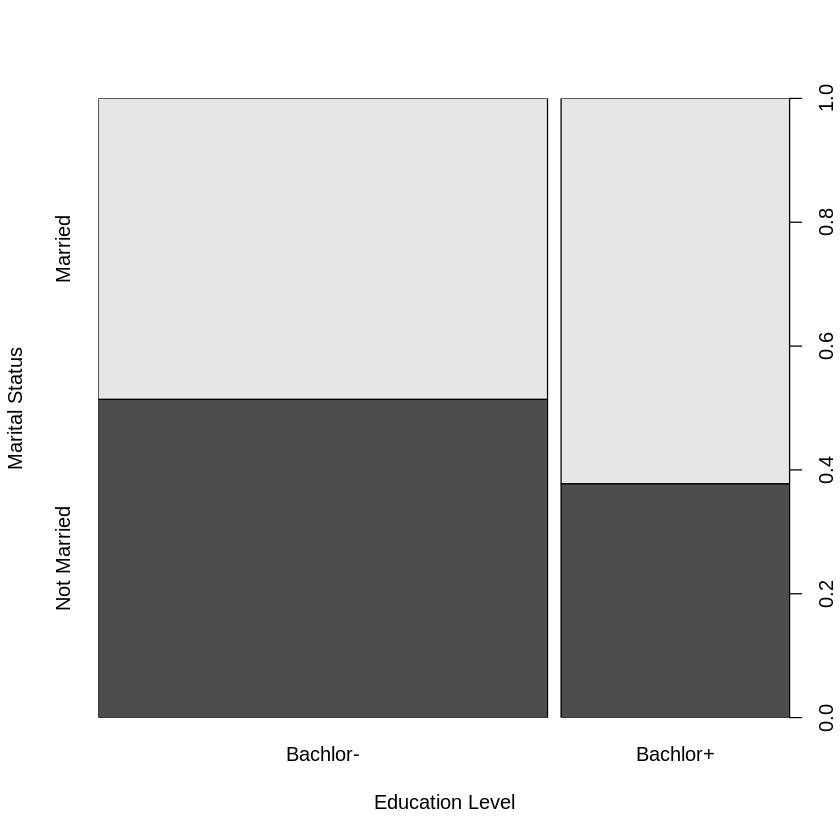

In [21]:
# Plot using the grouped education level and martial statuses
# Indicates Married group has a higher education level than Not Married group.
plot(DMDMARTZ_grouped ~ DMDEDUC2_grouped , data =demo_data_clean,ylab = "Marital Status" ,xlab = "Education Level" )

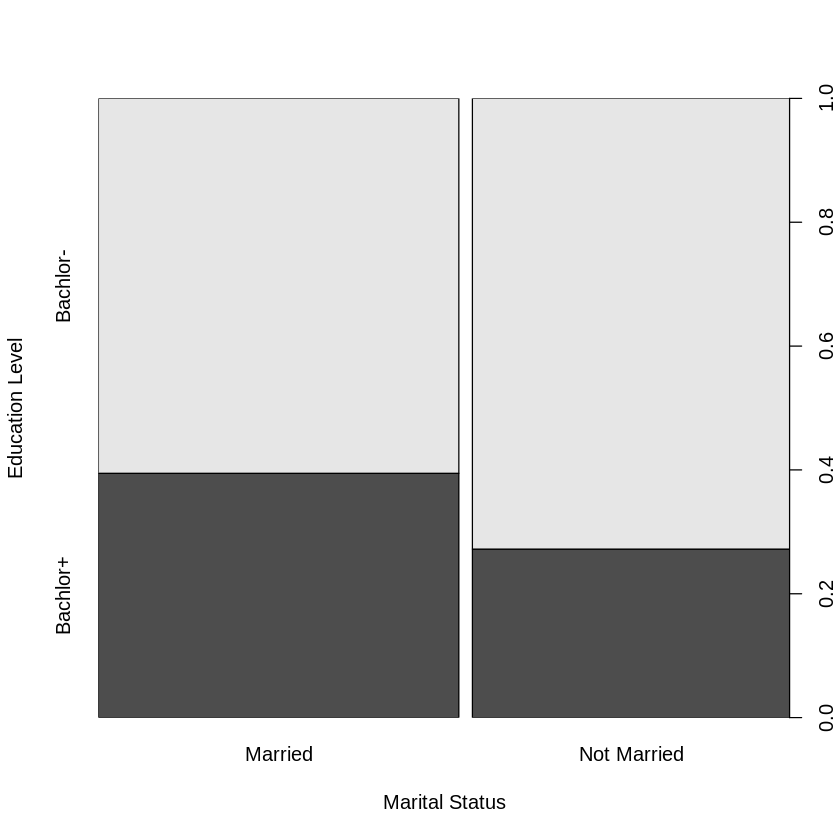

In [22]:
# Plot using the grouped marital status, the chart does not show any signficate difference.
# Indicates the group with the higher education level are Married.
plot(DMDEDUC2_grouped ~ DMDMARTZ_grouped , data =demo_data_clean,xlab = "Marital Status" ,ylab = "Education Level" )

  ## Question 2: Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?  
     - Variables: `DMDMARTZ` (marital status, recoded) and `PAD680` (sedentary behavior time, cleaned).

 Solution model selection process:
  - Model Selected = T-Test
  - IV = Martial status
  - DV = Means Sednarry behavior time

- Since the dependent variable (Mean Sedentary behavior time) is numerical and the independent variable (Marital Status) is categorical with two groups, a T-Test would be best to determine if there is a different in mean sedentary behavior time among marital status groups (married vs. not married).

Based on the results, there is a difference in the mean sedentary behavior time between married and not married people.
Married: 353.2108 minutes vs Not Married: 371.93 minutes.
The not married group is more likely to have sedentary behavior.

## DEMO_L.xpt [DMDMARTZ] & PAQ_L.xpt [PAD680]
### PAD680 - Minutes sedentary activity
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|0 to 1380	   |Range of Values              |8065   |8065        |
|7777	         |Refused	                     |6	     |8071	      |
|9999	         |Don't know	                 |67	   |8138	      |
|.	           |Missing	                     |15	   |8153	      |

### DMDMARTZ -Marital Status
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
| 1	           | Married/Living with partner | 4136	 | 4136	      |
| 2	           | Widowed/Divorced/Separated	 | 2022	 | 6158	      |
| 3	           | Never married	             | 1625	 | 7783	      |
| 77           | Refused	                   | 4	   | 7787	      |
| 99           | Don't know	                 | 5	   | 7792	      |
| .	           |Missing	                     | 4141	 | 11933	    |

In [23]:
# Merge the paq_data_cleaned dataframes on the 'SEQN' column with demo_clean_data
paq_merged_data <- merge(demo_data_clean, paq_data_clean, by = "SEQN")
#colnames(paq_merged_data)
# Display the first few rows of the merged dataframe
#paq_merged_data[, c("SEQN","DMDMARTZ", "PAD680")]

In [24]:
# Create two dataframe of married vs not married to prepare for T-test
paq_married <- subset(paq_merged_data,DMDMARTZ_grouped == "Married" )
paq_notMarried <- subset(paq_merged_data,DMDMARTZ_grouped == "Not Married")


In [25]:
# T-Test married vs not married using the PAD680 column
paq_t_test_result <- t.test(paq_married$PAD680, paq_notMarried$PAD680, var.equal = FALSE)
paq_t_test_result
# Based on the results there is difference in the mean sedimentary behavior time between married and not married people.
# Married 353.2108 minutes vs Not Married 371.93 minutes.
# The not married group is more likely to have sedimentary behavior


	Welch Two Sample t-test

data:  paq_married$PAD680 and paq_notMarried$PAD680
t = -3.8609, df = 7385.2, p-value = 0.0001139
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -28.229667  -9.216944
sample estimates:
mean of x mean of y 
 353.2108  371.9341 


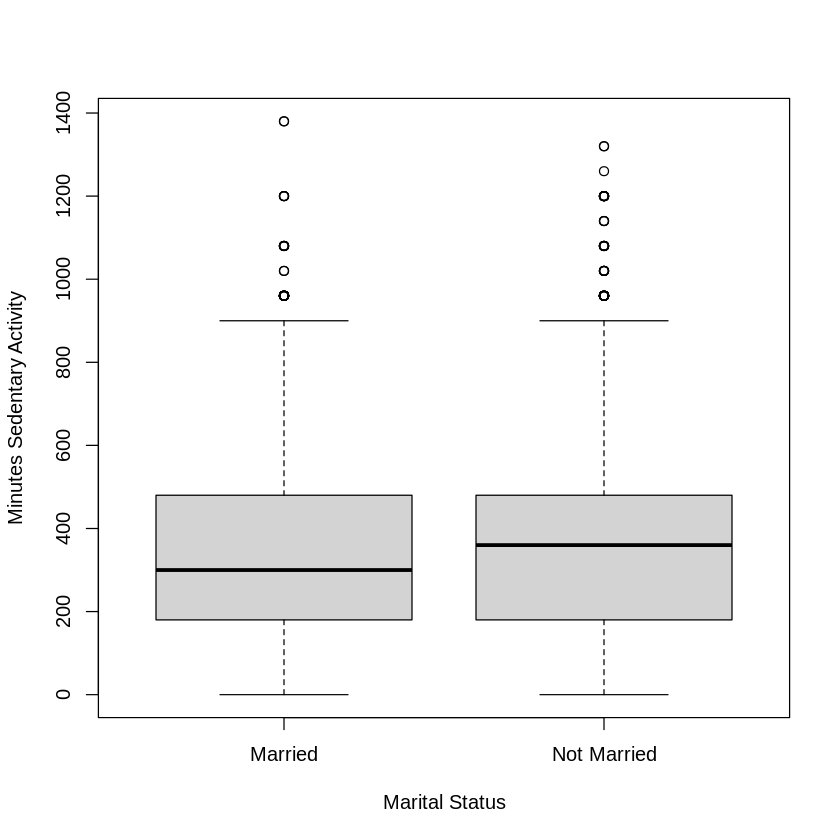

In [26]:
# Plot using the grouped marital status
plot(PAD680 ~ DMDMARTZ_grouped , data =paq_merged_data,xlab = "Marital Status",ylab = "Minutes Sedentary Activity"   )

  ## Question 3: How do age and marital status affect systolic blood pressure?
     - Variables: `RIDAGEYR` (age), `DMDMARTZ` (marital status, recoded), and `BPXOSY3` (systolic blood pressure).

Solution model selection process:
- Model Selected = Multiple Linear Regression
- IV = Age
- IV = Marital status
- DV = Systolic blood pressure

- Since the dependent variable (Systolic blood pressure) is continuous and there are two independent variables (Age, which is continuous, and Marital Status, which is categorical with two groups), a multiple linear regression would be best to determine how age and marital status affect systolic blood pressure.

The linear regression test results indicate that as Age [RIDAGEYR] increases, systolic pressure also increases with a low p-value (< 2e-16), strongly indicating a high association.
The marital status [DMDMARTZ] estimate of 1.34909 indicates that the not married group has a higher systolic pressure. The p-value of 0.0028 is less than 0.05, which strongly indicates a correlation between marital status and systolic blood pressure.

In [27]:
# Omitting 'Missing' age
demo_clean_with_age <- subset(demo_data_clean, !is.na (RIDAGEYR))
# Merge the bpxo_data_clean dataframes on the 'SEQN' column with demo_clean_with_age
bpxo_merged_data <- merge(demo_clean_with_age, bpxo_data_clean, by = "SEQN")
# Since this question compares 2 categories (ages and marital status) with systolic pressure linear regression method was selected for this analysis

In [28]:
# Create two dataframe of married vs not married to prepare for linear regression test
bpxo_married <- subset(bpxo_merged_data,DMDMARTZ_grouped == "Married" )
bpxo_notMarried <- subset(bpxo_merged_data,DMDMARTZ_grouped == "Not Married")

In [29]:
# Perform linear regression
regression_model <- lm(BPXOSY3 ~ RIDAGEYR + DMDMARTZ_grouped, data = bpxo_merged_data)

# Display the summary of the regression model
summary(regression_model)

# The result indicate as Age [RIDAGEYR] increases, systolic pressure also increase with low p-value 2e-16 close to zero with high assoication indications.
# Marital  Status [DMDMARTZ] estimate 1.2455 indicates the not married group has a higher systolic pressure, with p-value 0.006645 is less than 0.0.5 with high association indicating the results as strong correlation between martial status and systolic blood pressure


Call:
lm(formula = BPXOSY3 ~ RIDAGEYR + DMDMARTZ_grouped, data = bpxo_merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.251 -11.196  -1.467   9.385 106.119 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 100.81767    0.78505 128.422   <2e-16 ***
RIDAGEYR                      0.39524    0.01314  30.090   <2e-16 ***
DMDMARTZ_groupedNot Married   1.34909    0.45110   2.991   0.0028 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.1 on 5832 degrees of freedom
Multiple R-squared:  0.1344,	Adjusted R-squared:  0.1341 
F-statistic: 452.9 on 2 and 5832 DF,  p-value: < 2.2e-16


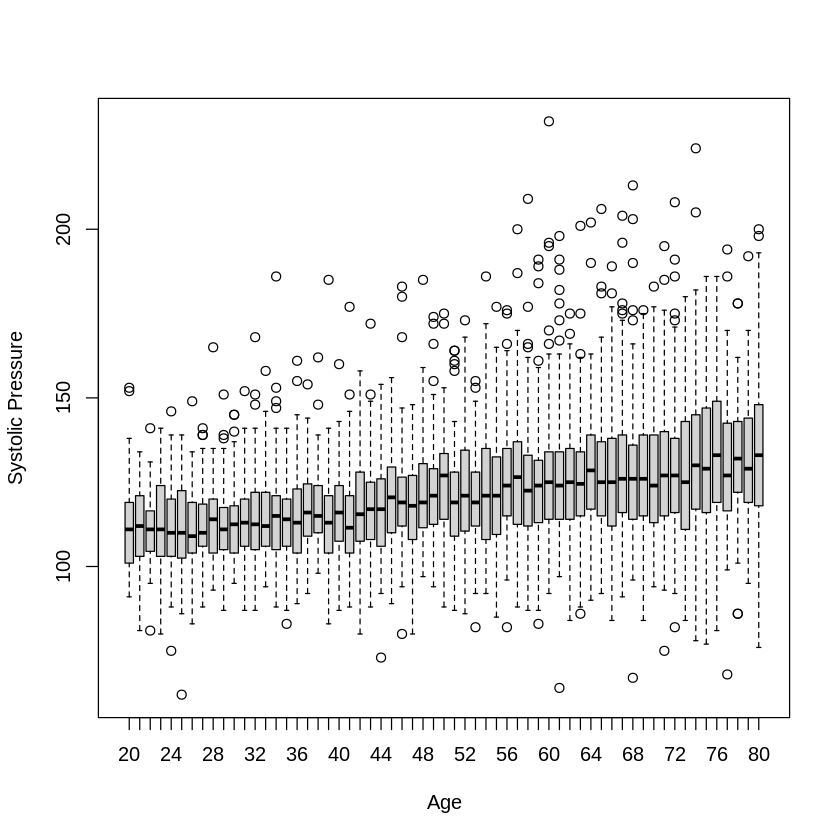

In [30]:
# plot difference base on age on systolic pressure
bpxo_merged_data$RIDAGEYR <- as.factor(bpxo_merged_data$RIDAGEYR)

# Plot using the age and systolic readings
plot(BPXOSY3  ~ RIDAGEYR , data =bpxo_merged_data,xlab = "Age",ylab = "Systolic Pressure")

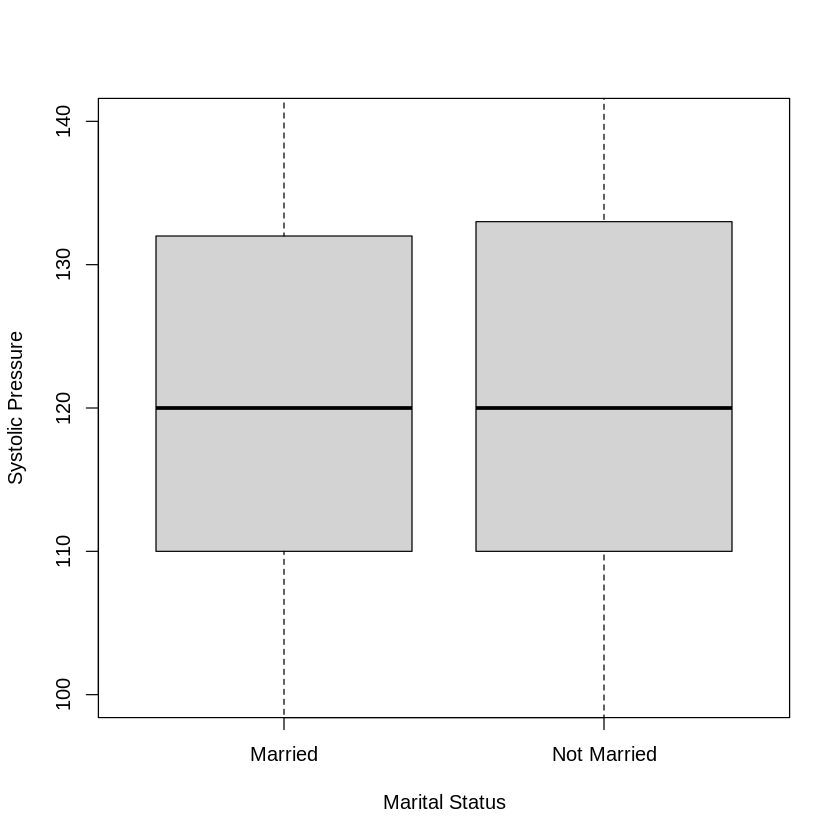

In [31]:
# plot visualziation of systolic pressure by marital status
bpxo_merged_data$DMDMARTZ_grouped <- as.factor(bpxo_merged_data$DMDMARTZ_grouped)

# Plot using marital status and systolic readings
# Adjust y-axis limits to magnify the difference
plot(BPXOSY3  ~ DMDMARTZ_grouped , data =bpxo_merged_data,xlab = "Marital Status",ylab = "Systolic Pressure", ylim = c(100, 140))

In [32]:
# Function to calculate mean, standard deviation, and standard error
summary_stats <- function(x) {
  mean_val <- mean(x, na.rm = TRUE)
  sd_val <- sd(x, na.rm = TRUE)
  n <- sum(!is.na(x))
  se_val <- sd_val / sqrt(n)
  return(c(mean = mean_val, sd = sd_val, se = se_val, n = n))
}

# Calculate summary statistics for systolic blood pressure by marital status
summary_by_marital_status = aggregate(BPXOSY3 ~ DMDMARTZ_grouped, data = bpxo_merged_data, FUN = summary_stats)

# Calculate the 95% confidence interval for the mean
# CI = mean +/- t * SE (using a t-distribution critical value, approx 1.96 for large n)
summary_by_marital_status$lower_ci = summary_by_marital_status$BPXOSY3[, "mean"] - 1.96 * summary_by_marital_status$BPXOSY3[, "se"]
summary_by_marital_status$upper_ci = summary_by_marital_status$BPXOSY3[, "mean"] + 1.96 * summary_by_marital_status$BPXOSY3[, "se"]

# Display the summary statistics with confidence intervals
# These results indicate while there is a significate statistical difference, the systolic blood pressure difference of (122.61mmHg -122.87mmHg).26mmHg is not a huge difference between the two martial status groups.
print(summary_by_marital_status)

  DMDMARTZ_grouped BPXOSY3.mean   BPXOSY3.sd   BPXOSY3.se    BPXOSY3.n lower_ci
1          Married  122.6098556   18.0448425    0.3196909 3186.0000000 121.9833
2      Not Married  122.8705172   18.7728772    0.3647454 2649.0000000 122.1556
  upper_ci
1 123.2364
2 123.5854


In [33]:
# T-Test married vs not married using the RIDAGEYR column
bpxo_merged_data <- t.test(bpxo_married$RIDAGEYR , bpxo_notMarried$RIDAGEYR , var.equal = FALSE)
bpxo_merged_data
# The T-Test results indicate married group has higher systolic pressure based on the age of married being higher than not married group (55.13622 vs 52.38241).


	Welch Two Sample t-test

data:  bpxo_married$RIDAGEYR and bpxo_notMarried$RIDAGEYR
t = 6.0726, df = 5322.4, p-value = 1.346e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.864805 3.642820
sample estimates:
mean of x mean of y 
 55.13622  52.38241 


 ## Question 4: Is there a correlation between self-reported weight and minutes of sedentary behavior?  
     - Variables: `WHD020` (self-reported weight, cleaned) and `PAD680` (sedentary behavior time, cleaned).

Solution model selection process:
- Model Selected = Linear Regression
- IV = Self-reported weight
- DV = Minutes of Sedentary behavior

- Since both the independent variable (self-reported weight) and the dependent variable (minutes of sedentary behavior) are continuous variables, a simple linear regression would be best to determine the correlation between them.

The linear regression test results indicate a weak correlation between reported weight and physical inactivity with an adjusted R-squared value of 0.0242.

## WHQ_L.xpt [WHD050] & PAQ_L.xpt [PAD680]
### WHD050 - Self-reported weight - 1 yr ago (pounds)
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|67 to 530	   |Range of Values              |8272	 |8272        |
|7777	         |Refused	                     |33	   |8305        |
|9999	         |Don't know	                 |181	   |8486        |
|.	           |Missing	                     |15	   |8501	      |


### PAD680 - Minutes sedentary activity
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|0 to 1380	   |Range of Values              |8065   |8065        |
|7777	         |Refused	                     |6	     |8071	      |
|9999	         |Don't know	                 |67	   |8138	      |
|.	           |Missing	                     |15	   |8153	      |

In [34]:
# Merge the whq_data_clean dataframes on the 'SEQN' column with paq_data_clean on SEQN
whq_merged_data <- merge(whq_data_clean, paq_data_clean, by = "SEQN")

In [35]:
# Perform linear regression
regression_model <- lm(PAD680 ~ WHD020, data = whq_merged_data)

# Display the summary of the regression model
summary(regression_model)

# The results indicate a weak correlation between reported weight and physical activity with adjusted R-squred value of 0.0242


Call:
lm(formula = PAD680 ~ WHD020, data = whq_merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-484.70 -154.33  -38.26  132.10 1049.06 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 239.32409    9.00957   26.56   <2e-16 ***
WHD020        0.67861    0.04819   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.9 on 7952 degrees of freedom
Multiple R-squared:  0.02433,	Adjusted R-squared:  0.0242 
F-statistic: 198.3 on 1 and 7952 DF,  p-value: < 2.2e-16


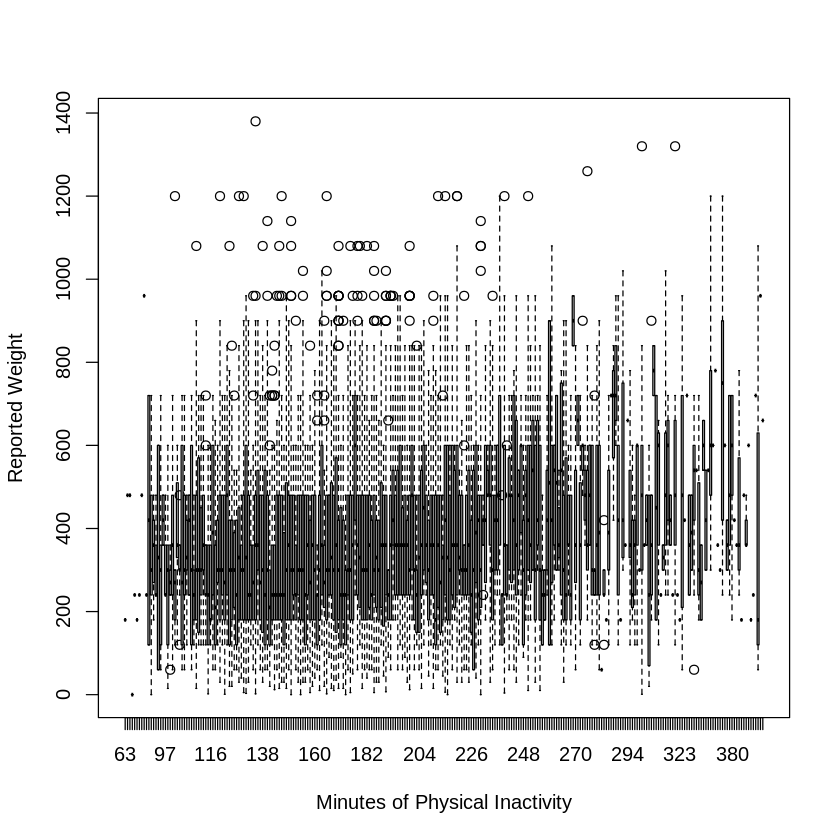

In [45]:
# plot difference physical activity and patient reported weight
whq_merged_data$WHD020 <- as.factor(whq_merged_data$WHD020)

# Plot using patient reported weight and physical activity
# Adjust y-axis limits to magnify the difference
#plot(PAD680  ~ WHD020 , data =whq_merged_data,xlab = "Minutes of Physical Inactivity",ylab = "Reported Weight", ylim = c(400, 350))
plot(PAD680  ~ WHD020 , data =whq_merged_data,xlab = "Minutes of Physical Inactivity",ylab = "Reported Weight")


  ## Question 5 (Creative Analysis): Develop your own unique question using at least one of the variables listed above. Ensure that your question can be answered using one of the following tests: chi-square, t-test, ANOVA, or correlation. Clearly state your question, explain why you chose the test, and document your findings.

  # How does vitamin D levels and Kidney failure affect diastolic pressure?
  - Variables: `BPXODIE` diastolic - 3rd oscillometric reading, `LBDVD2LC` vitamin D, and `KIQ022` kindey failure.
  - The selection of this question is related to the following research
      - https://pmc.ncbi.nlm.nih.gov/articles/PMC4101586/
      - https://pubmed.ncbi.nlm.nih.gov/39906471/

Solution model selection process:
- Model Selected = 2-way NOVA
- IV = Vitamin D level
- IV = Kidney failure
- DV = Diastolic Pressure

- Since the dependent variable (Diastolic Pressure) is continuous numerical value and the two indepenent variables are categorical with two values Yes vs No (Kidney falure)  and  Below lower detection limit vs At or above the detection limit for Vitamin D levels, a 2-way NOVA would be best to determine whether vitamin D levels and kidney failure affects diastolic pressure.

## VID_L.xpt [LBDVD2LC] & KIQ_U_L.xpt[KIQ022] ->BPXODI3_L.xpt[BPXODI3]

### LBDVIDLC - 25OHD2+25OHD3 comment code (Vitamin D levels)
|Code or Value | Value Description              | Count | Cumulative |
| ------------ | ------------------------------ | ----- | -----------|
| 0	           |At or above the detection limit	|7307	  |7307        |
| 1	           |Below lower detection limit	    |0	    |7307        |
| .	           |Missing	                        |1420	  |8727	       |


### KIQ022 - Ever told you had weak/failing kidneys? (Kidney Failure)
|Code or Value | Value Description | Count | Cumulative | Skip to Item|
| ------------ | ----------------- | ----- | -----------|-------------|
| 1	           | Yes               | 321	 | 321	      |             |
| 2	           | No	               | 7473	 | 7794	      |KIQ005       |
| 7	           | Refused	         | 0	   | 7794	      |KIQ005       |
| 9            | Don't know	       | 13	   | 7807	      |KIQ005       |
| .	           |Missing	           | 2	   | 7809	      |             |


###BPXODI3 - Diastolic - 3rd oscillometric reading

|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|24 to 136	   |Range of Values	             |7480	 |7480        |
|.	           |Missing	                     |321	   |7801        |

In [37]:
# Merge the bpxo_data_clean dataframes on the 'SEQN' column with vid_data_clean on SEQN
sub_vid_merged_data <- merge(bpxo_data_clean, vid_data_clean, by = "SEQN")
# Merge the kidney_failure_group dataframes on the 'SEQN' column with vid_data_clean & bpxo_data_clean on SEQN
vid_merged_data <- merge(sub_vid_merged_data, kiq_data_clean, by = "SEQN")

In [38]:

# Create two dataframe of individuals with and without kidney failure
normal_vitamin_D_group <- subset (vid_data_clean,LBDVIDLC==0)#7307
low_vitamin_D_group <- subset (vid_data_clean,LBDVIDLC==1)#0

# Create two dataframe of individuals with and without kidney failure
kidney_failure_group <- subset (kiq_data_clean,KIQ022==1)#321
No_kidney_failure_group <- subset (kiq_data_clean,KIQ022==2)#7473



In [39]:
# Merge the necessary dataframes for Two-way ANOVA: kiq_data_clean, vid_data_clean, and bpxo_data_clean
# Start by merging kidney failure data with vitamin D data
kidney_vid_merged_anova <- merge(kiq_data_clean, vid_data_clean, by = "SEQN")

# Now merge the result with diastolic blood pressure data
anova_merged_data <- merge(kidney_vid_merged_anova, bpxo_data_clean, by = "SEQN")

# Ensure the independent variables are factors with appropriate levels
# For KIQ022 (Kidney Failure): 1=Yes, 2=No (removing 7 and 9 handled in data cleaning)
anova_merged_data$KIQ022 <- factor(anova_merged_data$KIQ022, levels = c(1, 2), labels = c("Yes", "No"))

# For LBDVD2LC (Vitamin D comment code): 0=At or above detection limit, 1=Below lower detection limit
anova_merged_data$LBDVD2LC <- factor(anova_merged_data$LBDVD2LC, levels = c(0, 1), labels = c("Above Detection Limit", "Below Detection Limit"))

# Perform 2-way ANOVA
# Using the asterisk (*) to include the interaction term between LBDVD2LC and KIQ022
anova_model <- aov(BPXODI3 ~ LBDVD2LC * KIQ022, data = anova_merged_data)

# Display the summary of the 2-way ANOVA model
summary(anova_model)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
LBDVD2LC           1    939     939   7.611  0.00582 ** 
KIQ022             1   3526    3526  28.600 9.27e-08 ***
LBDVD2LC:KIQ022    1    108     108   0.875  0.34966    
Residuals       5396 665345     123                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

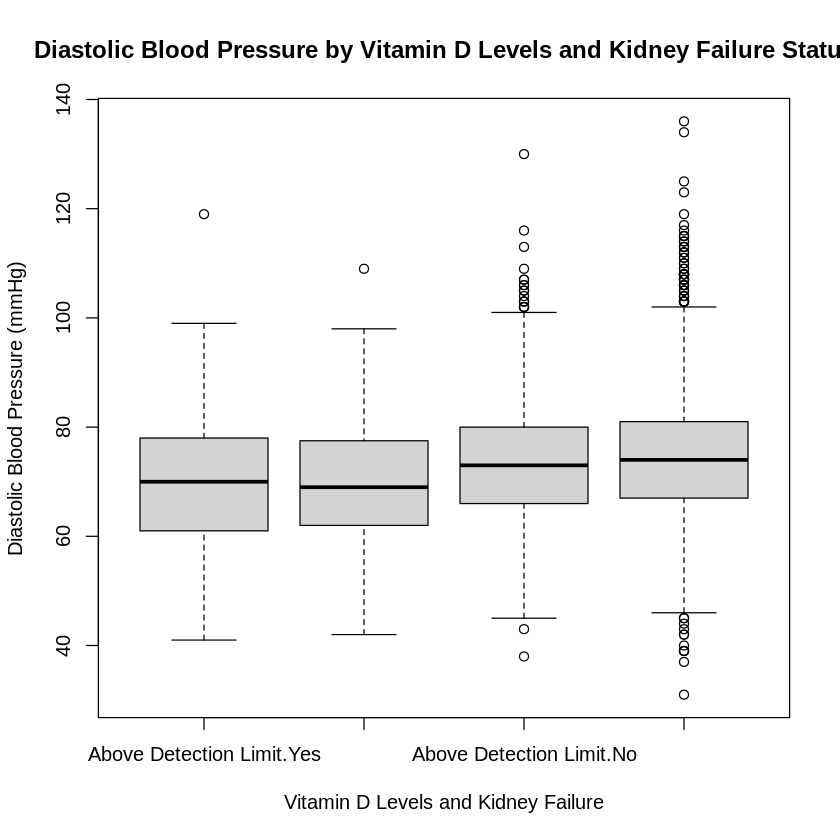

In [40]:
# Visualize the relationship between Diastolic Blood Pressure [BPXODI3] and the combination of Vitamin D levels [LBDVD2LC] and Kidney Failure [KIQ022] using a box plot
boxplot(BPXODI3 ~ LBDVD2LC * KIQ022, data = anova_merged_data,
        xlab = "Vitamin D Levels and Kidney Failure", ylab = "Diastolic Blood Pressure (mmHg)",
        main = "Diastolic Blood Pressure by Vitamin D Levels and Kidney Failure Status")

This box plot visualizes the distribution of diastolic blood pressure across the four groups defined by Vitamin D levels and Kidney Failure status.

Based on this visualization and the ANOVA results:

*   You can observe differences in the median and distribution of diastolic blood pressure between the groups.
*   The plot visually supports the finding that Kidney Failure status is associated with differences in diastolic blood pressure. The groups with "Yes" for Kidney Failure appear to have generally higher diastolic blood pressure compared to the "No" Kidney Failure groups, within each Vitamin D level.
*   The plot also suggests that Vitamin D levels might be associated with differences in diastolic blood pressure, though the visual difference between the "Above Detection Limit" and "Below Detection Limit" groups within each Kidney Failure status might be less pronounced than the difference related to Kidney Failure.
*   The relative parallelism of the boxes or median lines across the Vitamin D levels within each Kidney Failure status visually aligns with the ANOVA finding of no statistically significant interaction effect. This suggests that the effect of Vitamin D on diastolic pressure is similar for those with and without kidney failure, and vice versa.

This visualization provides a helpful complement to the statistical results, allowing for a more intuitive understanding of how these factors relate to diastolic blood pressure in your data.